In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils
import reg_utils
import gc_utils
%matplotlib inline
# 设置默认画布参数
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

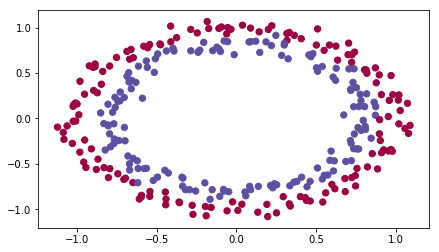

In [4]:
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot = True)

In [5]:
def model(X,Y,learning_rate=0.01,num_iterations=15000,print_cost=True,initialization="he",is_plot=True):
    """
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # 选择初始参数
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else:
        print("错误的初始化参数！程序退出")
        exit # 退出程序
        
    #开始学习
    for i in range(0, num_iterations):
        # 向前
        a3, cache = init_utils.forward_propagation(X,parameters)
        # 计算成本
        cost = init_utils.compute_loss(a3, Y)
        # 反向传播
        grads = init_utils.backward_propagation(X, Y, cache)
        # 更新参数
        parameters = init_utils.update_parameters(parameters, grads, learning_rate)
        
        # 记录成本
        if i % 1000 == 0:
            costs.append(cost)
            #打印成本
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
                
    # 绘制曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel("cost")
        plt.xlabel("interations(per hundreds)")
        plt.title("Learninf rate = " + str(learning_rate))
        
    # 返回参数
    return parameters

In [6]:
# 初始化为0
def initialize_parameters_zeros(layers_dims):
    """"""
    parameters = {}
    
    L = len(layers_dims) # 网络层数
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
        # 断言确保数据格式正确
        assert(parameters["W" + str(l)].shape == (layers_dims[l], layers_dims[l - 1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l], 1))
        
    return parameters

In [7]:
parameters = initialize_parameters_zeros([3, 2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


第0次迭代，成本值为：0.69314718056
第1000次迭代，成本值为：0.69314718056
第2000次迭代，成本值为：0.69314718056
第3000次迭代，成本值为：0.69314718056
第4000次迭代，成本值为：0.69314718056
第5000次迭代，成本值为：0.69314718056
第6000次迭代，成本值为：0.69314718056
第7000次迭代，成本值为：0.69314718056
第8000次迭代，成本值为：0.69314718056
第9000次迭代，成本值为：0.69314718056
第10000次迭代，成本值为：0.69314718056
第11000次迭代，成本值为：0.69314718056
第12000次迭代，成本值为：0.69314718056
第13000次迭代，成本值为：0.69314718056
第14000次迭代，成本值为：0.69314718056


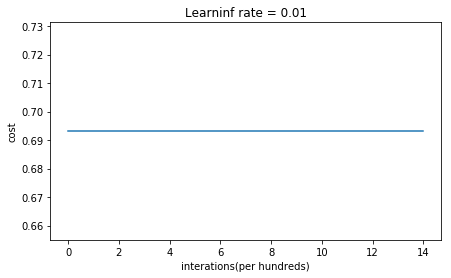

In [8]:
parameters = model(train_X, train_Y, initialization="zeros", is_plot=True)

In [9]:
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

训练集：
Accuracy: 0.5
测试集：
Accuracy: 0.5


predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


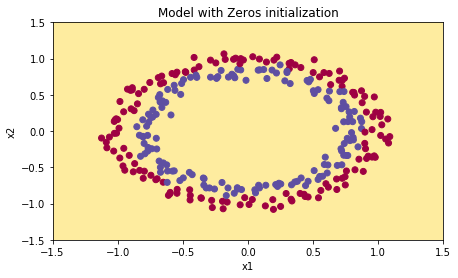

In [10]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x : init_utils.predict_dec(parameters, x.T), train_X, train_Y) # 用匿名函数的方式传入函数

In [11]:
def initialize_parameters_random(layers_dims):
    """
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l -1]) * 10 # 10倍缩放
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
        # 使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l], layers_dims[l - 1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l], 1))
        
    return parameters

In [12]:
parameters = initialize_parameters_random([3, 2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


第0次迭代，成本值为：inf


E:\Projects\Pythonprojects\test\Course 2- Week1\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\Projects\Pythonprojects\test\Course 2- Week1\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第1000次迭代，成本值为：0.625098279396
第2000次迭代，成本值为：0.59812165967
第3000次迭代，成本值为：0.56384175723
第4000次迭代，成本值为：0.55017030492
第5000次迭代，成本值为：0.544463290966
第6000次迭代，成本值为：0.5374513807
第7000次迭代，成本值为：0.476404207407
第8000次迭代，成本值为：0.397814922951
第9000次迭代，成本值为：0.393476402877
第10000次迭代，成本值为：0.392029546188
第11000次迭代，成本值为：0.389245981351
第12000次迭代，成本值为：0.386154748571
第13000次迭代，成本值为：0.38498472891
第14000次迭代，成本值为：0.382782830835
训练集：
Accuracy: 0.83
测试集：
Accuracy: 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
  0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
  1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
  1 1 0 0 1 0 0 0 1 0 0

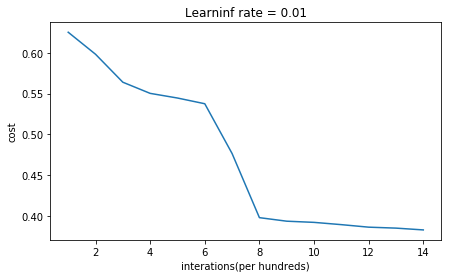

In [13]:
parameters = model(train_X, train_Y, initialization = "random",is_plot=True)
print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print(predictions_train)
print(predictions_test)

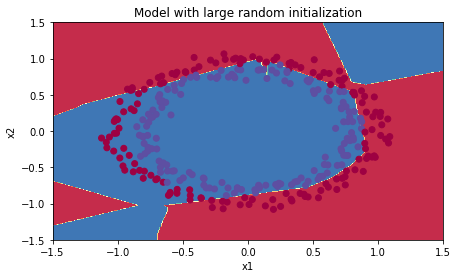

In [14]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

In [15]:
def initialize_parameters_he(layers_dims):
    """"""
    np.random.seed(3)               # 指定随机种子
    parameters = {}
    L = len(layers_dims)            # 层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

In [16]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


第0次迭代，成本值为：0.883053746342
第1000次迭代，成本值为：0.687982591973
第2000次迭代，成本值为：0.675128626452
第3000次迭代，成本值为：0.652611776889
第4000次迭代，成本值为：0.608295897057
第5000次迭代，成本值为：0.530494449172
第6000次迭代，成本值为：0.413864581707
第7000次迭代，成本值为：0.311780346484
第8000次迭代，成本值为：0.236962153303
第9000次迭代，成本值为：0.185972872092
第10000次迭代，成本值为：0.150155562804
第11000次迭代，成本值为：0.123250792923
第12000次迭代，成本值为：0.0991774654653
第13000次迭代，成本值为：0.0845705595402
第14000次迭代，成本值为：0.0735789596268
训练集:
Accuracy: 0.993333333333
测试集:
Accuracy: 0.96


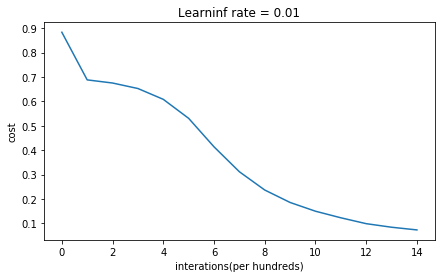

In [17]:
parameters = model(train_X, train_Y, initialization = "he",is_plot=True)
print("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集:")
init_utils.predictions_test = init_utils.predict(test_X, test_Y, parameters)

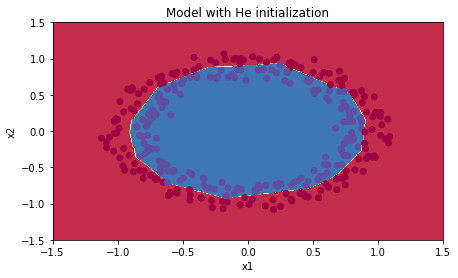

In [18]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)

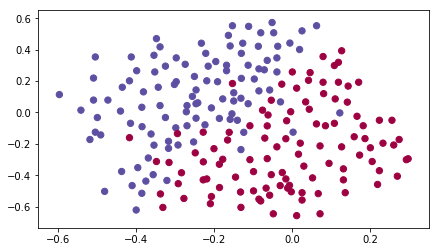

In [19]:
#加载数据
train_X, strain_Y, test_X, test_Y = reg_utils.load_2D_dataset(is_plot=True)

In [22]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,is_plot=True,lambd=0,keep_prob=1):
    """
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # 初始化参数
    parameters = reg_utils.initialize_parameters(layers_dims)
    
    # 开始学习
    for i in range(0, num_iterations):
        # 向前
        # 是否随机删除节点
        if keep_prob == 1:
            # 不删除
            a3, cache = reg_utils.forward_propagation(X, parameters)
        elif keep_prob < 1:
            # 随机删除
            a3, cache = forward_propagation_with_dropout(X, parameters,keep_prob)
        else:
            print("keep_prob参数错误!程序退出")
            exit
            
        # 计算成本
        # 是否使用二范数
        if lambd == 0:
            # 不用L2
            cost = reg_utils.compute_cost(a3, Y)
        else:
            # L2正则化
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # 反向
        # L2和随机删除点可同时使用， 这里不用
        assert(lambd == 0 or keep_prob ==1)
        
         ##两个参数的使用情况
        if (lambd == 0 and keep_prob == 1):
            ### 不使用L2正则化和不使用随机删除节点
            grads = reg_utils.backward_propagation(X,Y,cache)
        elif lambd != 0:
            ### 使用L2正则化，不使用随机删除节点
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            ### 使用随机删除节点，不使用L2正则化
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        #更新参数
        parameters = reg_utils.update_parameters(parameters, grads, learning_rate)

        #记录并打印成本
        if i % 1000 == 0:
            ## 记录成本
            costs.append(cost)
            if (print_cost and i % 10000 == 0):
                #打印成本
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))

    #是否绘制成本曲线图
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (x1,000)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回学习后的参数
    return parameters

In [23]:
parameters = model(train_X, train_Y,is_plot=True)
print("训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("测试集:")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)

ValueError: operands could not be broadcast together with shapes (1,211) (1,300) 

In [ ]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: reg_utils.predict_dec(parameters, x.T), train_X, train_Y)

In [ ]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = reg_utils.compute_cost(A3, Y)
    
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sun(np.square(W2)) + np.sun(np.square(W3))) / (2 * m)
    
    cost = cross_entroy_cost + L2_regularization_cost
    
    return cost

In [20]:
# 改变了成本函数重写反向传播函数
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    """
    m = X.shape[1]
    
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + ((lambd * W3) / m)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0)) #　relu反向传播
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + ((lambd * W2) / m)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1, X.T) + ((lambd * W1) / m)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {
        "dZ3":dZ3, "dW3":dW3, "db3":db3, "dA2":dA2,
        "dZ2":dZ2, "dW3":dW2, "db2":db2, "dA1":dA1,
        "dZ1":dZ1, "dW1":dW1, "db1":db1
    }
    
    return gradients

In [22]:
parameters = model(train_X, train_Y, lambd=0.7, is_plot=True)
print("使用正则化，训练集：")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("使用正则化")
predictions_test = reg_utils.predict(test_X, test_Y, parameters)

NameError: name 'compute_cost_with_regularization' is not defined

In [23]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
reg_utils.plot_decision_boundary(lambda x: reg_utils.predict(parameters, x.T, train_X, train_Y

SyntaxError: unexpected EOF while parsing (<ipython-input-23-174ec040f230>, line 5)

In [36]:
# dropout
def forward_propagation_with_dropout(X, parameters, keep_prob=0.5):
    """"""
    np.random.seed(1)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Linear->Relu->linea->Relu->Linear->Sigmoid
    Z1 = np.dot(W1, X) + b1
    A1 = reg_utils.relu(Z1)
    # 下面4步对应上述1-4步
    D1 = np.random.rand(A1.shape[0], A1.shape[1])# 1：初始化矩阵D1
    D1 = D1 < keep_prob                          # 2：D1值转换成0和1
    A1 = A1 * D1                                 # 3：舍弃一些节点
    A1 = A1 / keep_prob                          # 4：缩放未舍弃的节点值
    
    Z2 = np.dot(W2, A1) + b2
    A2 = reg_utils.relu(Z2)
    # 下面4步对应上述1-4步
    D2 = np.random.rand(A2.shape[0], A2.shape[1])# 1：初始化矩阵D2
    D2 = D2 < keep_prob                          # 2：D2值转换成0和1
    A2 = A2 * D2                                 # 3：舍弃一些节点
    A2 = A2 / keep_prob                          # 4：缩放未舍弃的节点值
    
    Z3 = np.dot(W3, A2) + b3
    A3 = reg_utils.sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2,Z3, A3, W3, b3)
    
    return A3,cache

In [37]:
# Dropout的方向传播
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """"""
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2,Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dA2 = dA2 * D2                          # 1:使用正向传播相同的节点
    dA2 = dA2 / keep_prob                   # 缩放未舍弃节点

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))#????????????????????????????????
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dA1 = dA1 * D1                          # 1:使用正向传播相同的节点
    dA1 = dA1 / keep_prob                   # 缩放未舍弃节点
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {
        "dZ3":dZ3, "dW3":dW3, "db3":db3, "dA2":dA2,
        "dZ2":dZ2, "dW3":dW2, "db2":db2, "dA1":dA1,
        "dZ1":dZ1, "dW1":dW1, "db1":db1
    }
    
    return gradients

In [38]:
parameters = model(train_X, train_Y, keep_prob=0.86, learning_rate=0.3,is_plot=True)

print("使用随机删除节点，训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("使用随机删除节点，测试集:")
reg_utils.predictions_test = reg_utils.predict(test_X, test_Y, parameters)

ValueError: operands could not be broadcast together with shapes (1,211) (1,300) 

ValueError: c of shape (300,) not acceptable as a color sequence for x with size 211, y with size 211

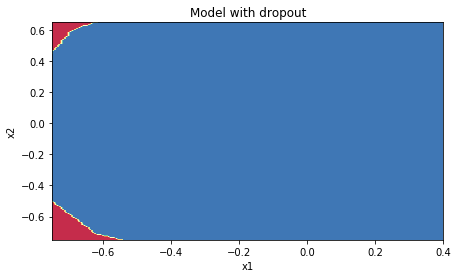

In [39]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
reg_utils.plot_decision_boundary(lambda x: reg_utils.predict_dec(parameters, x.T), train_X, train_Y)

In [45]:
# 梯度检验
def forward_propagation(X, theta):
    """"""
    J = np.dot(theta, x)
    
    return J

In [46]:
#测试forward_propagation
print("-----------------测试forward_propagation-----------------")
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

-----------------测试forward_propagation-----------------
J = 8


In [43]:
# 反向
def backward_propagation(x, theta):
    """"""
    dtheta = x
    
    return dtheta

In [44]:
#测试backward_propagation
print("-----------------测试backward_propagation-----------------")
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

-----------------测试backward_propagation-----------------
dtheta = 2


In [49]:
# 梯度检验
def gradient_check(x, theta, epsilon=1e-7):
    """"""
    # 计算gradapprox
    thetaplus = theta + epsilon
    thetaminus = theta - epsilon
    J_plus = forward_propagation(x, thetaplus)
    J_minus = forward_propagation(x, thetaminus)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    
    # 梯度检查
    grad = backward_propagation(x, theta)
    
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator
    
    if difference < 1e-7:
        print("梯度检查：梯度正常！")
    else:
        print("梯度检查：梯度超出阈值！！")
    
    return difference

In [50]:
#测试gradient_check
print("-----------------测试gradient_check-----------------")
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

-----------------测试gradient_check-----------------
梯度检查：梯度正常！
difference = 2.91933588329e-10


In [ ]:
# 待续.......................................................................